In [3]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import missingno as msno 
import seaborn as sns
from heatmap import corrplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [10]:
data= pd.read_excel('ANZ synthesised transaction dataset.xlsx', parse_dates=['date', 'extraction'])

In [11]:
data.head()

,status,card_present_flag,account,len_account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,movement,Unnamed: 15
0,authorized,1.0,ACC-1598451071,10,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,debit,NaN
1,authorized,0.0,ACC-1598451071,10,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,debit,NaN
2,authorized,1.0,ACC-1222300524,10,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,debit,NaN
3,authorized,1.0,ACC-1037050564,10,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,debit,NaN
4,authorized,1.0,ACC-1598451071,10,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,debit,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   account            12043 non-null  object             
 3   len_account        12043 non-null  int64              
 4   txn_description    12043 non-null  object             
 5   first_name         12043 non-null  object             
 6   balance            12043 non-null  float64            
 7   date               12043 non-null  datetime64[ns]     
 8   gender             12043 non-null  object             
 9   age                12043 non-null  int64              
 10  merchant_suburb    7717 non-null   object             
 11  merchant_state     7717 non-null   object             
 12  extraction         12043 non-null  datetime64[

In [4]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

# Task 1

## Missing Value

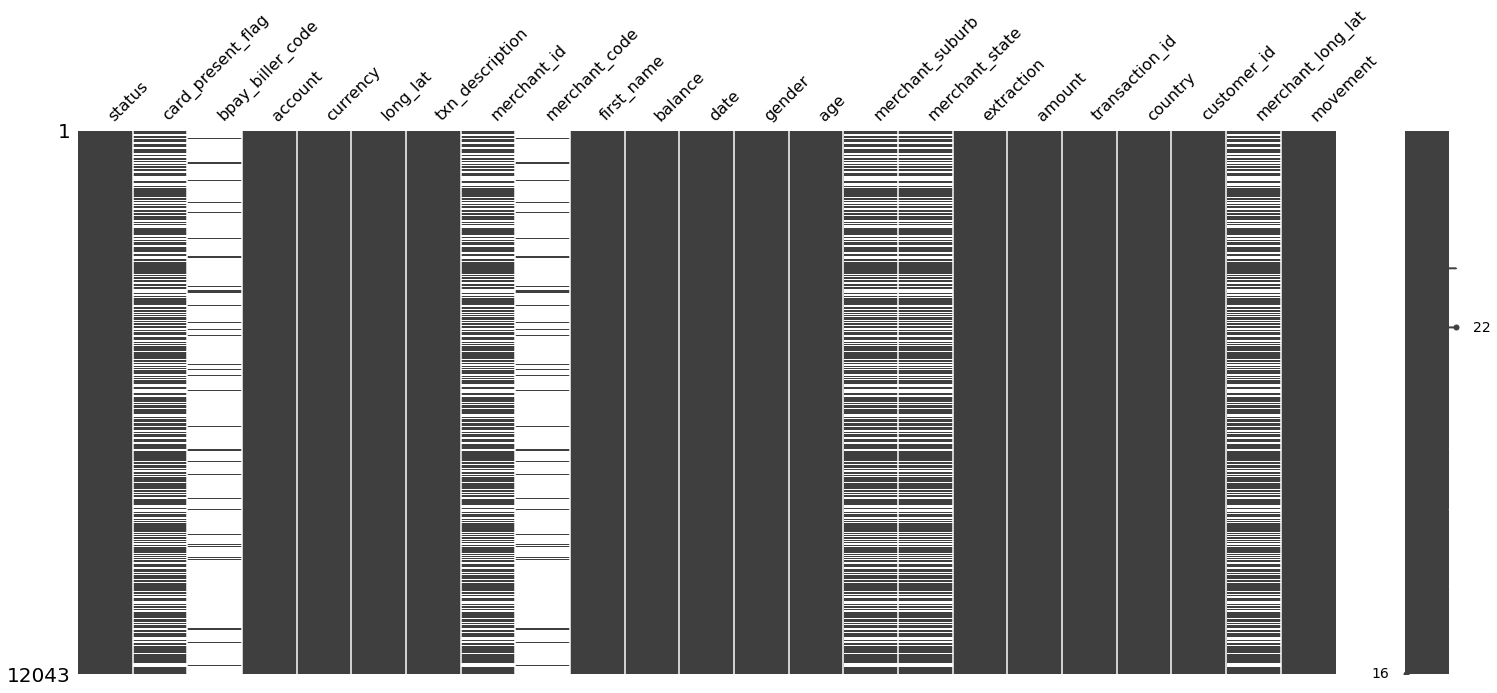

In [5]:
msno.matrix(data)

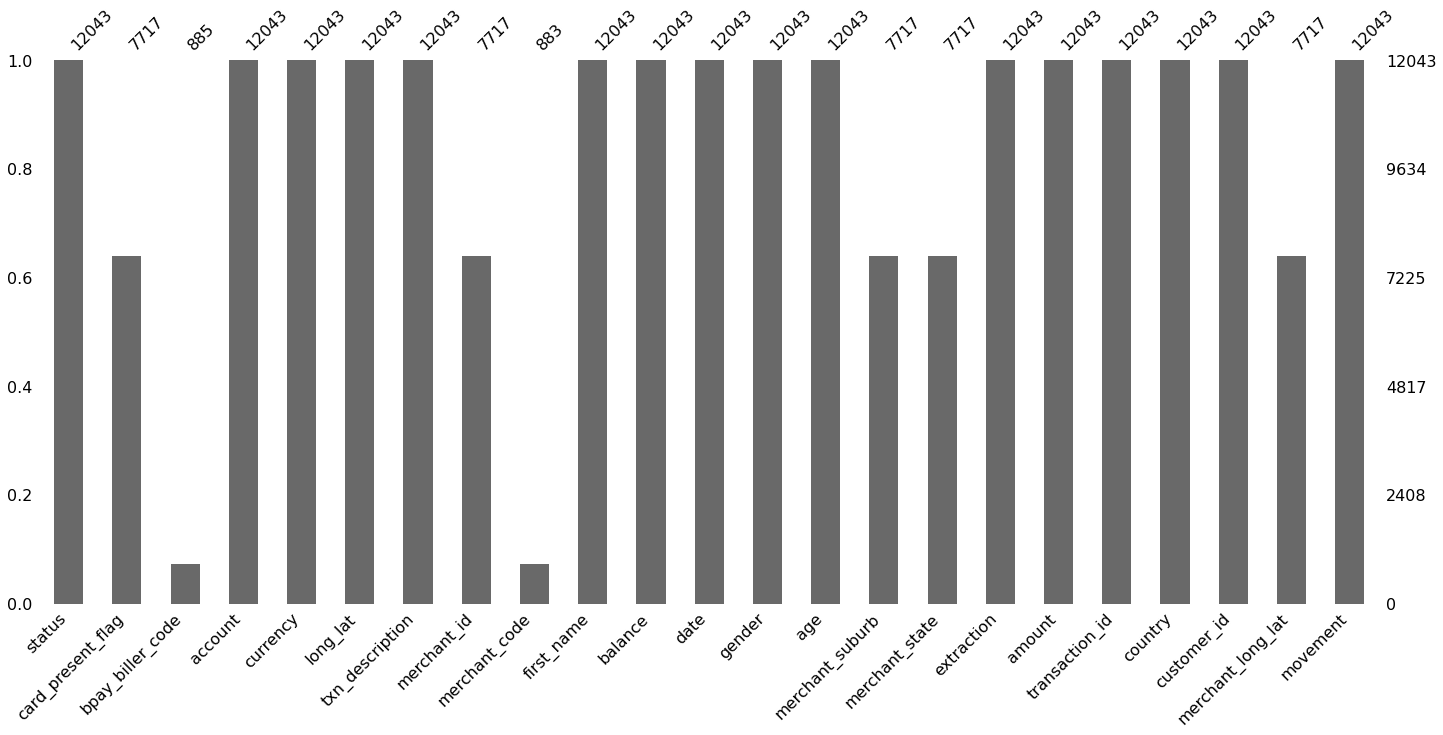

In [6]:
msno.bar(data)

In [7]:
missing=['bpay_biller_code','merchant_code', 'transaction_id']
data.drop(missing,axis=1,inplace=True)

## AGE

In [8]:
age_bins = np.linspace(data['age'].values.min(),data['age'].values.max(), 10)
age_bins = [int(i) for i in age_bins]
labels = [f"{age_bins[i]}-{age_bins[i+1]}" for i in range(len(age_bins)-1)]
data['AGE_RANGE'] = pd.cut(data['age'], age_bins, labels=labels)

In [9]:
print('total first_name are - ', data.first_name.nunique()) # 

total first_name are -  80


In [10]:
print('total customers_id are - ', data.customer_id.nunique()) # 

total customers_id are -  100


In [11]:
data.groupby('first_name').agg({'customer_id':'nunique'}).query('customer_id > 1')

,customer_id
first_name,
Christopher,2
Eric,2
Jeffrey,2
Jessica,2
Joseph,2
Kenneth,2
Kimberly,3
Linda,2
Michael,6


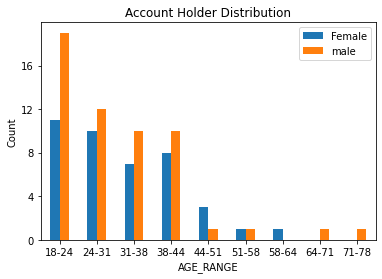

In [12]:
data.groupby(['AGE_RANGE', 'gender']).agg({'customer_id': 'nunique'}).unstack().plot(kind = 'bar')
plt.title('Account Holder Distribution')
plt.ylabel('Count')
plt.yticks(range(0, 20, 4))
plt.xticks(range(0, len(labels)), labels,rotation = 0)
plt.legend(['Female', 'male'])
plt.show()

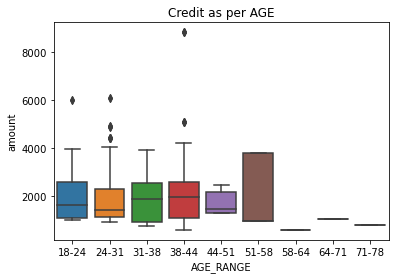

In [13]:
df = data.groupby('movement').get_group('credit').loc[:,['AGE_RANGE', 'amount']]
ax = sns.boxplot(x="AGE_RANGE", y="amount", data=df)
plt.title('Credit as per AGE')
plt.show()

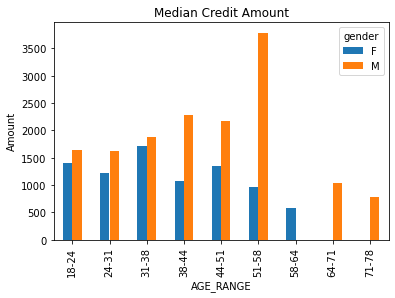

In [14]:
data.groupby(['AGE_RANGE','gender',  'movement']).agg({'amount':'median'}).unstack().unstack()['amount']['credit'].plot(kind = 'bar')
plt.title('Median Credit Amount')
plt.ylabel('Amount')
plt.xticks(range(0, len(labels)), labels)
plt.show()

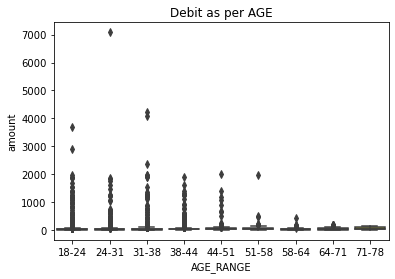

In [15]:
df = data.groupby('movement').get_group('debit').loc[:,['AGE_RANGE', 'amount']]
ax = sns.boxplot(x="AGE_RANGE", y="amount", data=df)
plt.title('Debit as per AGE')
plt.show()

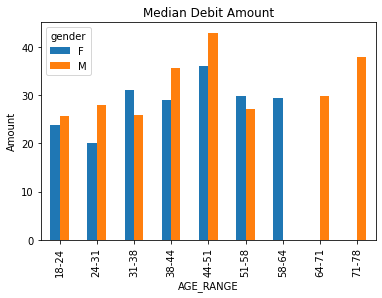

In [16]:
data.groupby(['AGE_RANGE', 'gender', 'movement']).agg({'amount':'median'}).unstack().unstack()['amount']['debit'].plot(kind = 'bar')
plt.title('Median Debit Amount')
plt.ylabel('Amount')
plt.show()

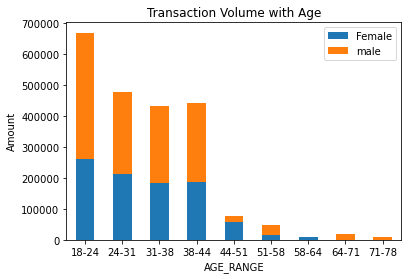

In [17]:
data.groupby(['AGE_RANGE', 'gender']).agg({'amount' : 'sum'}).unstack().plot(kind = 'bar', stacked=True)
plt.title('Transaction Volume with Age')
plt.ylabel('Amount')
plt.xticks(rotation = 0)
plt.legend(['Female', 'male'])
plt.show()

## Location

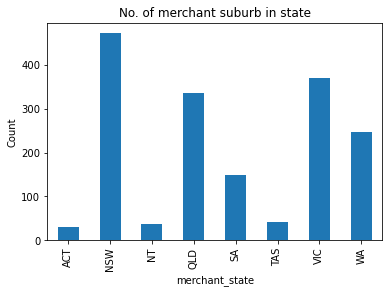

In [18]:
data.groupby('merchant_state').agg({'merchant_suburb':'nunique'}).sort_values('merchant_state').plot(kind = 'bar', legend = None)
plt.title('No. of merchant suburb in state')
plt.ylabel('Count')
plt.show()

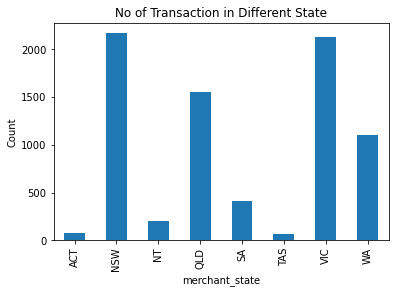

In [19]:
data.groupby('merchant_state').size().to_frame().sort_values('merchant_state').plot(kind = 'bar', legend = False)
plt.title('No of Transaction in Different State')
plt.ylabel('Count')
plt.show()

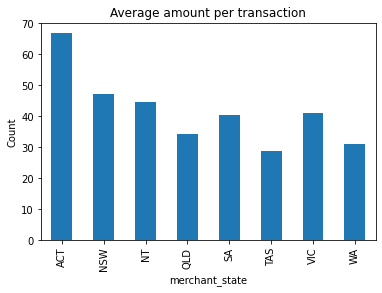

In [20]:
data.groupby(['merchant_state']).agg({'amount': ['mean']}).sort_values('merchant_state').plot(kind = 'bar', legend = None)
plt.title('Average amount per transaction')
plt.ylabel('Count')
plt.show()

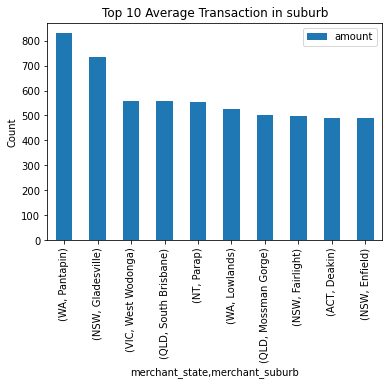

In [21]:
data.groupby(['merchant_state','merchant_suburb']).agg({'amount': 'mean'}).sort_values('amount', ascending = False)[:10].plot(kind = 'bar')
plt.title('Top 10 Average Transaction in suburb')
plt.ylabel('Count')
plt.show()

In [22]:
data.groupby(['merchant_state', 'movement']).agg({'amount': 'mean'})

,,amount
merchant_state,movement,
ACT,debit,66.803836
NSW,debit,47.036316
NT,debit,44.726293
QLD,debit,34.372397
SA,debit,40.425470
TAS,debit,28.866618
VIC,debit,41.099953
WA,debit,30.901873


no credit only debit

In [23]:
data['customer_longitude'] = data['long_lat'].str.split(" ").str.get(0)
data['customer_latitude'] = data['long_lat'].str.split(" ").str.get(1)
data['merchant_longitude'] = data['merchant_long_lat'].str.split(" ").str.get(0)
data['merchant_latitude'] = data['merchant_long_lat'].str.split(" ").str.get(1)
data['merchant_latitude'].fillna(0, inplace = True)
data['merchant_longitude'].fillna(0, inplace = True)



def distance(x):
    if x['merchant_longitude'] != 0:

        origin = (float(x['customer_longitude']), float(x['customer_latitude']))
        destination = (float(x['merchant_longitude']), float(x['merchant_latitude']))
        lat1, lon1 = origin
        lat2, lon2 = destination
        radius = 6371 # km

        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c

        return d
    else:
        return 0
    

data['distance'] = data.apply(lambda x: distance(x), axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EA767B400>]],
      dtype=object)

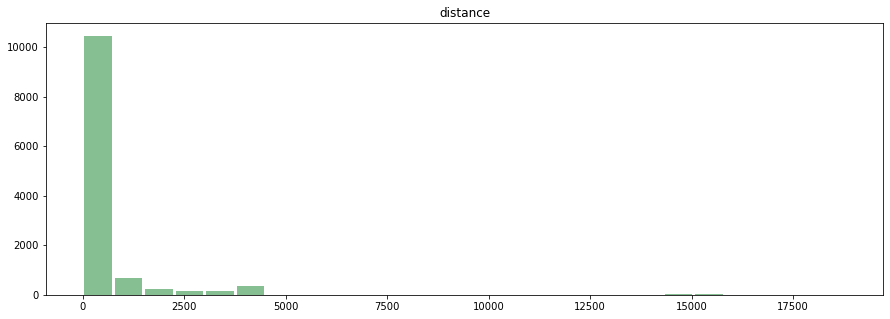

In [24]:
data.hist(column='distance',  bins=25, grid=False, figsize=(15,5), color='#86bf91', zorder=2, rwidth=0.9)

In [25]:
data.query('distance > 10000').first_name.unique()

array(['Daniel'], dtype=object)

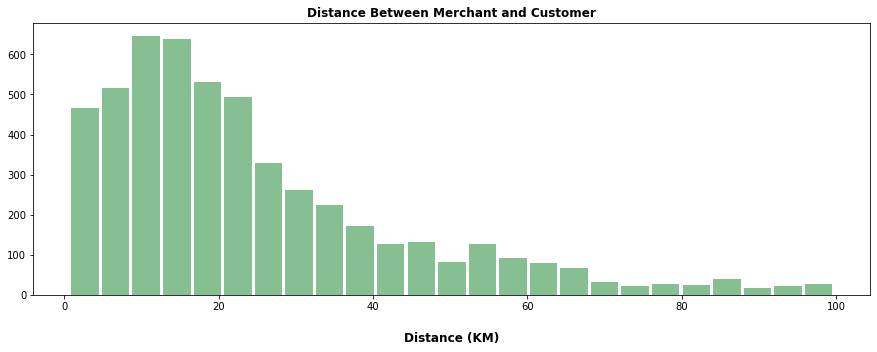

In [26]:
df = data.query('distance > 0 and distance <100')
df.hist(column='distance',  bins=25, grid=False, figsize=(15,5), color='#86bf91', zorder=2, rwidth=0.9)
plt.title('Distance Between Merchant and Customer', weight='bold', size=12)
plt.xlabel('Distance (KM)', labelpad=20, weight='bold', size=12)
plt.show()

## Customer

In [27]:
cus_seg = data.groupby(['customer_id']).agg({'amount':['sum', 'count']}).reset_index()
cus_seg['rank'] = cus_seg['amount'].apply(lambda x: x[0]*x[1], axis = 1)
active_cus = cus_seg.sort_values('rank', ascending = False)[:10].customer_id

In [28]:
cus_seg = data[data['customer_id'].isin(active_cus)]
cus_seg.first_name.unique()

array(['Diana', 'Michael', 'Tonya', 'Ricky', 'Kimberly', 'Michelle',
       'Richard', 'Jessica', 'Craig', 'Sandra'], dtype=object)

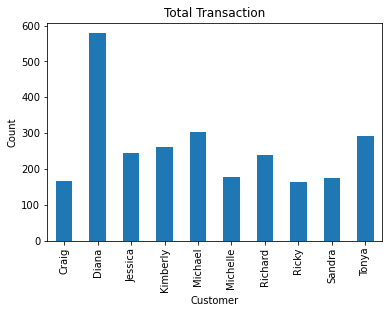

In [29]:
cus_seg1 = cus_seg.groupby(['first_name']).size().reset_index().sort_values('first_name')[:10]
cus_seg1.plot(kind = 'bar', legend = None, title = 'Total Transaction').set(xlabel='Customer', ylabel='Count')
plt.xticks(range(0, len(cus_seg1.first_name)), cus_seg1.first_name)
plt.show()

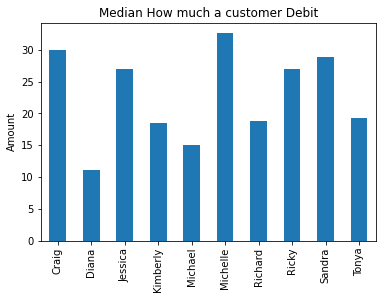

In [30]:
cus_seg1 = cus_seg.groupby(['first_name','movement']).aggregate({'amount': 'median'}).reset_index()
cus_seg1 = cus_seg1.query('movement == "debit"').sort_values('first_name')[:20]
cus_seg1.plot(kind = 'bar', legend = False)
plt.title('Median How much a customer Debit')
plt.ylabel('Amount')
plt.xticks(range(0, len(cus_seg1.first_name)), cus_seg1.first_name)
plt.show()

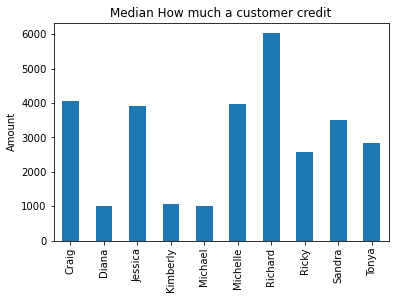

In [31]:
cus_seg1 = cus_seg.groupby(['first_name','movement']).aggregate({'amount': 'median'}).reset_index()
cus_seg1 = cus_seg1.query('movement == "credit"').sort_values('first_name')
cus_seg1.plot(kind = 'bar', legend = False)
plt.title('Median How much a customer credit')
plt.ylabel('Amount')
plt.xticks(range(0, len(cus_seg1.first_name)), cus_seg1.first_name)
plt.show()

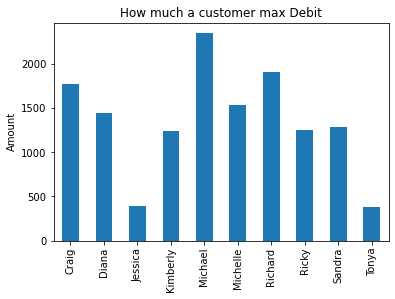

In [32]:
cus_seg1 = cus_seg.groupby(['first_name','movement']).aggregate({'amount': 'max'}).reset_index()
cus_seg1 = cus_seg1.query('movement == "debit"').sort_values('first_name')
cus_seg1.plot(kind = 'bar', legend = False)
plt.title('How much a customer max Debit')
plt.ylabel('Amount')
plt.xticks(range(0, len(cus_seg1.first_name)), cus_seg1.first_name)
plt.show()

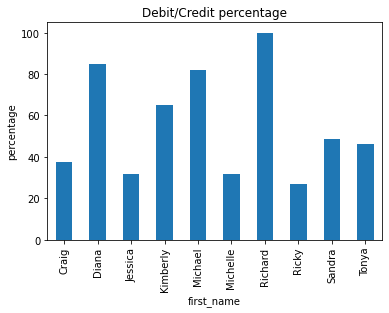

In [33]:
cus_seg1 = cus_seg.groupby(['first_name','movement']).aggregate({'amount': 'sum'}).unstack()
cus_seg1['ratio'] = round(cus_seg1.amount.debit / cus_seg1.amount.credit *100, 1)
cus_seg1.iloc[:,-1].plot(kind = 'bar')
plt.title('Debit/Credit percentage')
plt.ylabel('percentage')
plt.show()

## Date and Time

In [34]:
data['months']=data['date'].dt.strftime("%m")

data['date_num'] = data.date.dt.strftime('%d')

data['day'] = data.date.dt.strftime('%A')

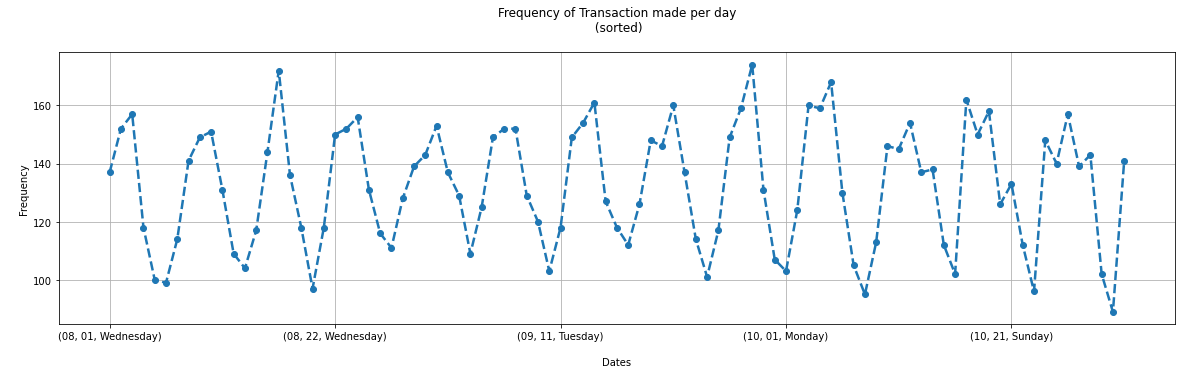

In [35]:
data.groupby(['months', 'date_num', 'day']).agg({'amount':'count'}).plot(linewidth=2.5,linestyle='--',marker='o', figsize = (20, 5), legend = None)
plt.xlabel('\nDates')
plt.ylabel('\nFrequency')
plt.title('Frequency of Transaction made per day\n (sorted)\n')
plt.grid(True)
plt.show()

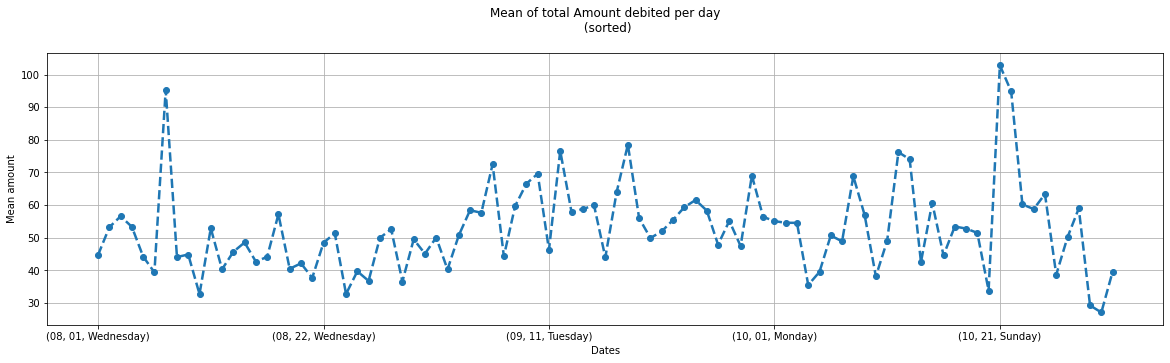

In [36]:
data.groupby(['months', 'date_num', 'day', 'movement']).agg({'amount':'mean'}).unstack()['amount']['debit'].plot(linewidth=2.5,linestyle='--',marker='o', figsize = (20, 5), legend = None)
plt.xlabel('Dates')
plt.ylabel('Mean amount')
plt.title('Mean of total Amount debited per day\n (sorted)\n')
plt.grid(True)
plt.show()

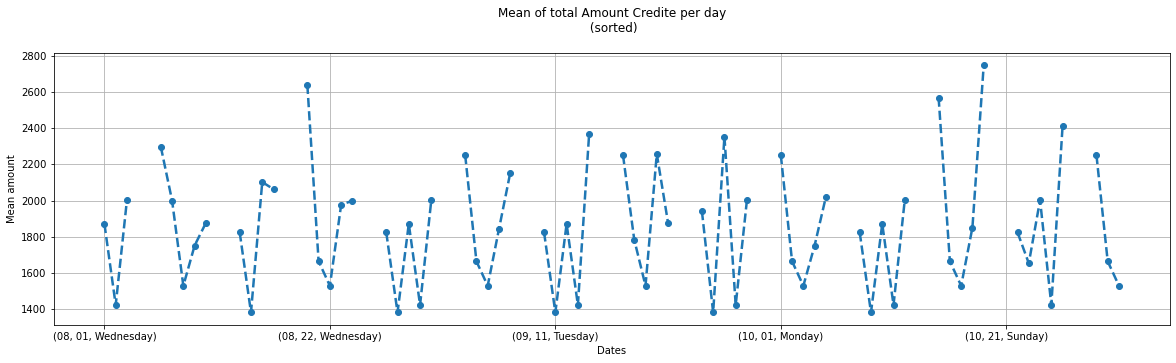

In [37]:
data.groupby(['months', 'date_num', 'day', 'movement']).agg({'amount':'mean'}).unstack()['amount']['credit'].plot(linewidth=2.5,linestyle='--',marker='o', figsize = (20, 5), legend = None)
plt.xlabel('Dates')
plt.ylabel('Mean amount')
plt.title('Mean of total Amount Credite per day\n (sorted)\n')
plt.grid(True)
plt.show()

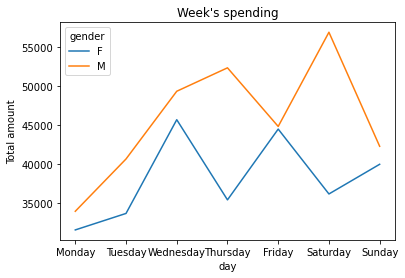

In [38]:
df = round(data.groupby(['day', 'gender', 'movement']).agg(
    {'amount': 'sum'}).unstack().unstack(), 1)['amount']['debit'].sort_index()
df['dayorder'] = [4, 0, 5, 6, 3, 1, 2]
df.sort_values('dayorder').drop('dayorder', axis=1).plot(
    title="Week's spending").set(ylabel='Total amount')
plt.show()

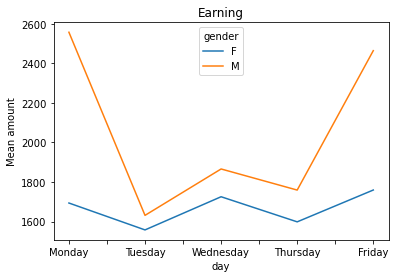

In [39]:
df = round(data.groupby(['day','gender', 'movement']).agg({'amount': 'mean'}).unstack().unstack(), 1)['amount']['credit'].sort_index()
df['dayorder'] = [4, 0, 5, 6, 3, 1, 2]
df.sort_values('dayorder').drop('dayorder', axis = 1).plot(title = "Earning").set(ylabel = 'Mean amount')
plt.show()

In [40]:
data['transaction_hour'] = data.apply(lambda x: int(x['extraction'].split("T")[-1].split(":")[0]), axis = 1)

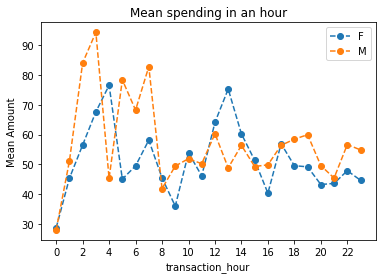

In [41]:
data.groupby(['transaction_hour', 'movement', 'gender']).agg({'amount': ['mean']}).query('movement == "debit"').unstack().unstack().plot(kind='line',linewidth=1.5,linestyle='--',marker='o',title = 'Mean spending in an hour')
plt.ylabel('Mean Amount')
# plt.grid(True)
plt.legend(['F', 'M'])
plt.xticks(np.arange(0, 24, 2))
plt.show()


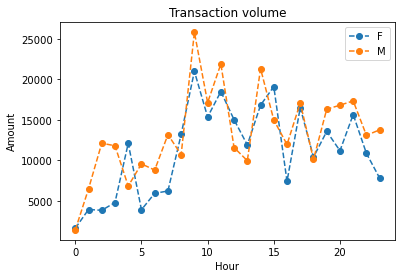

In [42]:
data.groupby(['transaction_hour', 'movement', 'gender']).agg({'amount': ['sum']}).query('movement == "debit"').sort_values('transaction_hour').unstack().unstack().plot(kind='line',linewidth=1.5,linestyle='--',marker='o')
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.legend(['F', 'M'])
plt.title('Transaction volume')
plt.show()

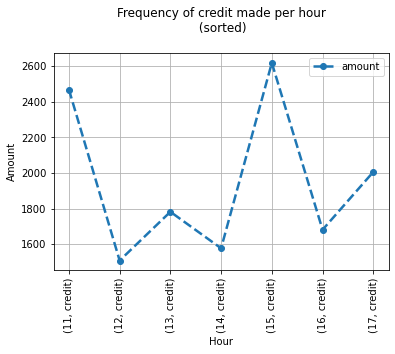

In [43]:
data.groupby(['transaction_hour', 'movement']).agg({'amount': 'mean'}).query('movement == "credit"').sort_values('transaction_hour').plot(kind='line',linewidth=2.5,linestyle='--',marker='o')
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.title('Frequency of credit made per hour\n (sorted)\n')
plt.legend()
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

## transaction mode

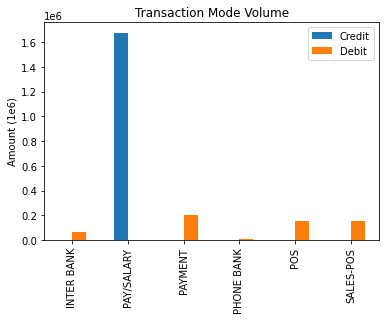

In [44]:
data.groupby(['txn_description','movement']).agg({'amount':'sum'}).unstack().plot(kind = 'bar',
                                                                                  title = 'Transaction Mode Volume').set(ylabel = 'Amount (1e6)', xlabel = None)
plt.legend(['Credit', 'Debit'])
plt.show()

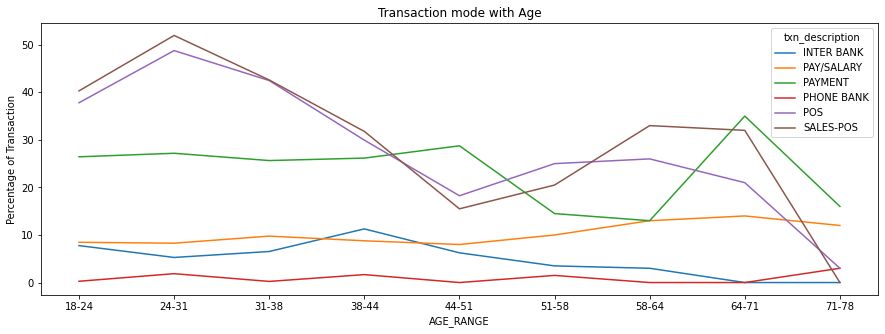

In [46]:
size = data.groupby('AGE_RANGE').agg({'customer_id': 'nunique'})
df = data.groupby(['AGE_RANGE', 'txn_description']).size()/size['customer_id']
df.unstack().plot(kind = 'line', figsize=(15,5))
plt.title('Transaction mode with Age')
plt.ylabel('Percentage of Transaction')
plt.xticks(range(0, len(labels)), labels)
plt.show()

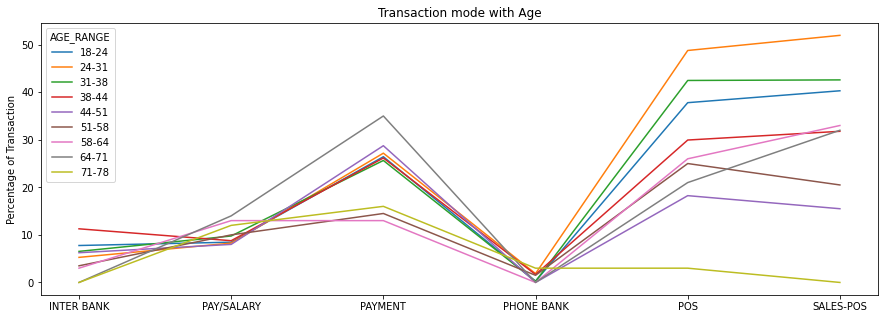

In [47]:
size = data.groupby('AGE_RANGE').agg({'customer_id': 'nunique'})
df = data.groupby([ 'txn_description','AGE_RANGE']).size()/size['customer_id']
df.unstack().plot(kind = 'line', figsize=(15,5))
plt.title('Transaction mode with Age')
plt.ylabel('Percentage of Transaction')
plt.xlabel(None)
# plt.xticks(range(0, len(labels)), labels)
plt.show()

## Credit and Debit

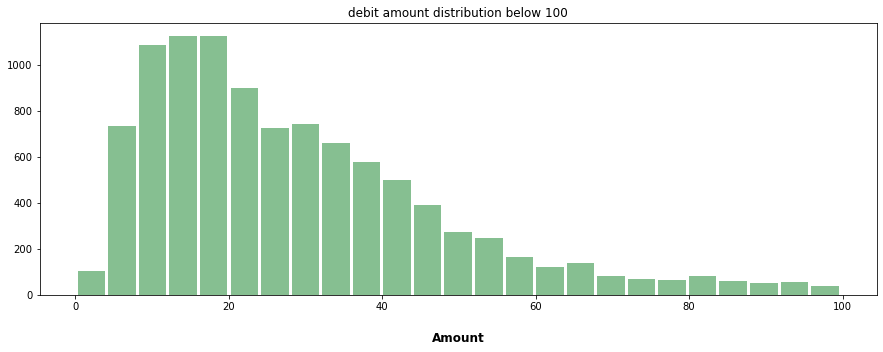

In [48]:
debit = data.groupby('movement').get_group('debit')
df = debit.query('amount <100').amount

df.hist( bins=25, grid=False, figsize=(15,5), color='#86bf91', zorder=2, rwidth=0.9, )
plt.title('debit amount distribution below 100')
plt.xlabel('Amount', labelpad=20, weight='bold', size=12)
plt.show()

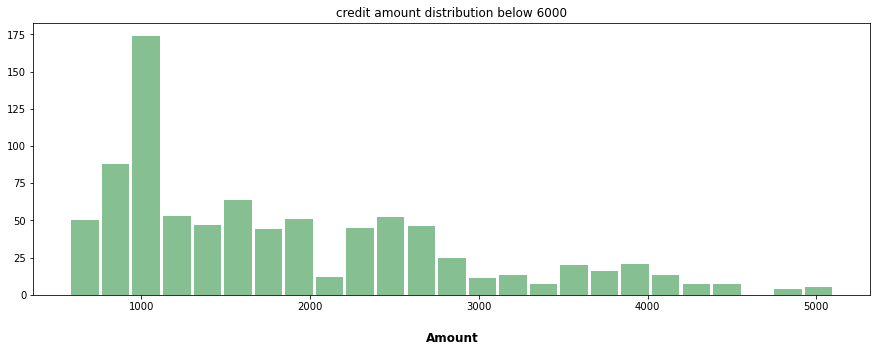

In [49]:
debit = data.groupby('movement').get_group('credit')
df = debit.query('amount <6000').amount

df.hist( bins=25, grid=False, figsize=(15,5), color='#86bf91', zorder=2, rwidth=0.9, )
plt.title('credit amount distribution below 6000')
plt.xlabel('Amount', labelpad=20, weight='bold', size=12)
plt.show()

# task 2

## calculating Salary

In [50]:
cus_salary_data = data.query('movement == "credit"').groupby(
    ['customer_id']).agg({'amount': ['nunique']})
cus_salary_data

,amount
,nunique
customer_id,
CUS-1005756958,1
CUS-1117979751,1
CUS-1140341822,1
CUS-1147642491,1
CUS-1196156254,1
...,...
CUS-72755508,1
CUS-809013380,1


In [51]:
cus_salary_data[cus_salary_data['amount']["nunique"]>1]

,amount
,nunique
customer_id,


every customer is creditted with unique amount in three months this must be their salary but lets find out first,
whats the frequency this pay/salary?

In [52]:
cus_salary_data = data.query('movement == "credit"').groupby(
    ['customer_id', 'months']).agg({'amount': ['nunique', 'size']}).unstack()

cus_salary_data

amount                         
               nunique           size          
months              08   09   10   08   09   10
customer_id                                    
CUS-1005756958     1.0  1.0  1.0  4.0  4.0  5.0
CUS-1117979751     1.0  1.0  1.0  2.0  2.0  3.0
CUS-1140341822     1.0  1.0  1.0  2.0  2.0  2.0
CUS-1147642491     1.0  1.0  1.0  4.0  4.0  5.0
CUS-1196156254     1.0  1.0  1.0  3.0  2.0  2.0
...                ...  ...  ...  ...  ...  ...
CUS-72755508       1.0  1.0  1.0  4.0  4.0  4.0
CUS-809013380      1.0  1.0  1.0  4.0  4.0  5.0
CUS-860700529      1.0  1.0  1.0  2.0  2.0  2.0
CUS-880898248      1.0  1.0  1.0  2.0  2.0  2.0
CUS-883482547      1.0  1.0  1.0  2.0  2.0  3.0

[100 rows x 6 columns]

In [53]:
cus_salary_data['mean_of_size'] = cus_salary_data.amount['size'].mean(
    axis=1)  # for comparing if they are getting same freqency every month

In [54]:
# these four are not getting salary for every month
cus_salary_data[cus_salary_data.amount['size'].sum(
    axis=1, skipna=False).isna()]

amount                          mean_of_size
               nunique           size                       
months              08   09   10   08   09   10             
customer_id                                                 
CUS-1739931018     NaN  1.0  1.0  NaN  1.0  1.0          1.0
CUS-2178051368     NaN  1.0  1.0  NaN  1.0  1.0          1.0
CUS-497688347      1.0  NaN  1.0  1.0  NaN  1.0          1.0
CUS-51506836       1.0  1.0  NaN  1.0  1.0  NaN          1.0

In [55]:
# these are customers whose salary frequency same for different month include above four alse
cus_salary_data[cus_salary_data.amount['size']
                ['10'] == cus_salary_data.mean_of_size]

amount                          mean_of_size
               nunique           size                       
months              08   09   10   08   09   10             
customer_id                                                 
CUS-1140341822     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-1233833708     1.0  1.0  1.0  4.0  4.0  4.0          4.0
CUS-1478398256     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-1499065773     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-1604596597     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-1609060617     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-1646183815     1.0  1.0  1.0  4.0  4.0  4.0          4.0
CUS-1739931018     NaN  1.0  1.0  NaN  1.0  1.0          1.0
CUS-1892177589     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-1896554896     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2083971310     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2178051368     NaN  1.0  1.0  NaN  1.0  1.0          1.0
CUS-2206365095     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2283904812     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2348881191     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2370108457     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2484453271     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2599279756     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2630892467     1.0  1.0  1.0  4.0  4.0  4.0          4.0
CUS-2663907001     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-2688605418     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3117610635     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3174332735     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3201519139     1.0  1.0  1.0  4.0  4.0  4.0          4.0
CUS-331942311      1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3395687666     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3431016847     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3462882033     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3702001629     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3904958894     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-3989008654     1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-423725039      1.0  1.0  1.0  1.0  1.0  1.0          1.0
CUS-497688347      1.0  NaN  1.0  1.0  NaN  1.0          1.0
CUS-586638664      1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-72755508       1.0  1.0  1.0  4.0  4.0  4.0          4.0
CUS-860700529      1.0  1.0  1.0  2.0  2.0  2.0          2.0
CUS-880898248      1.0  1.0  1.0  2.0  2.0  2.0          2.0

In [56]:
# these are customers whose salary frequency different for different month
cus_salary_data[cus_salary_data.amount['size']
                ['10'] != cus_salary_data.mean_of_size]

amount                          mean_of_size
               nunique           size                       
months              08   09   10   08   09   10             
customer_id                                                 
CUS-1005756958     1.0  1.0  1.0  4.0  4.0  5.0     4.333333
CUS-1117979751     1.0  1.0  1.0  2.0  2.0  3.0     2.333333
CUS-1147642491     1.0  1.0  1.0  4.0  4.0  5.0     4.333333
CUS-1196156254     1.0  1.0  1.0  3.0  2.0  2.0     2.333333
CUS-1220154422     1.0  1.0  1.0  3.0  2.0  2.0     2.333333
...                ...  ...  ...  ...  ...  ...          ...
CUS-527400765      1.0  1.0  1.0  2.0  2.0  3.0     2.333333
CUS-537508723      1.0  1.0  1.0  3.0  2.0  2.0     2.333333
CUS-55310383       1.0  1.0  1.0  4.0  4.0  5.0     4.333333
CUS-809013380      1.0  1.0  1.0  4.0  4.0  5.0     4.333333
CUS-883482547      1.0  1.0  1.0  2.0  2.0  3.0     2.333333

[63 rows x 7 columns]

To make this eazy, Annual salary = mean of size * amount * 12

In [57]:
customer_annual_salary = cus_salary_data.mean_of_size * \
    data.query('movement == "credit"').groupby(
        ['customer_id']).first().amount * 12

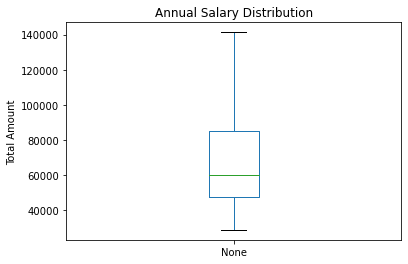

In [58]:
customer_annual_salary.plot.box(showfliers=False, title = 'Annual Salary Distribution').set(ylabel = 'Total Amount')
plt.show()


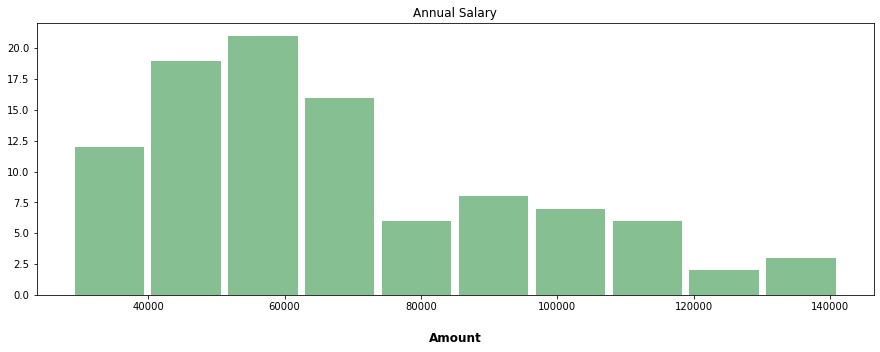

In [59]:
customer_annual_salary.hist(bins=10,  grid=False, figsize=(
    15, 5), color='#86bf91', zorder=2, rwidth=0.9, )
plt.title('Annual Salary')
plt.xlabel('Amount', labelpad=20, weight='bold', size=12)
plt.show()

In [60]:
customer_annual_salary = customer_annual_salary.to_frame()

In [61]:
customer_annual_salary.columns = ['Annual_Salary']

In [62]:
data = data.merge(customer_annual_salary, how  = 'left', on='customer_id')

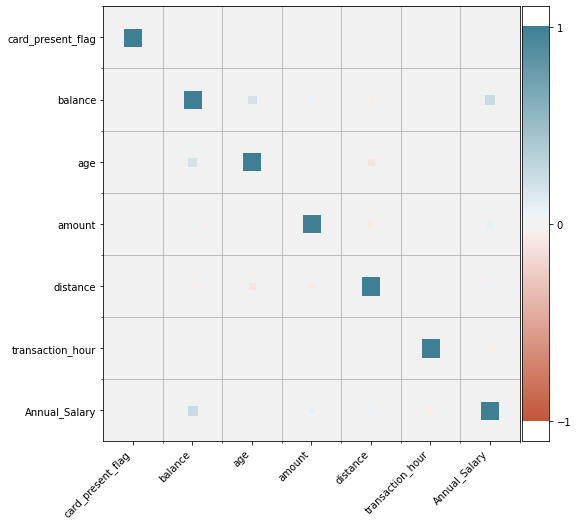

In [63]:
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300);

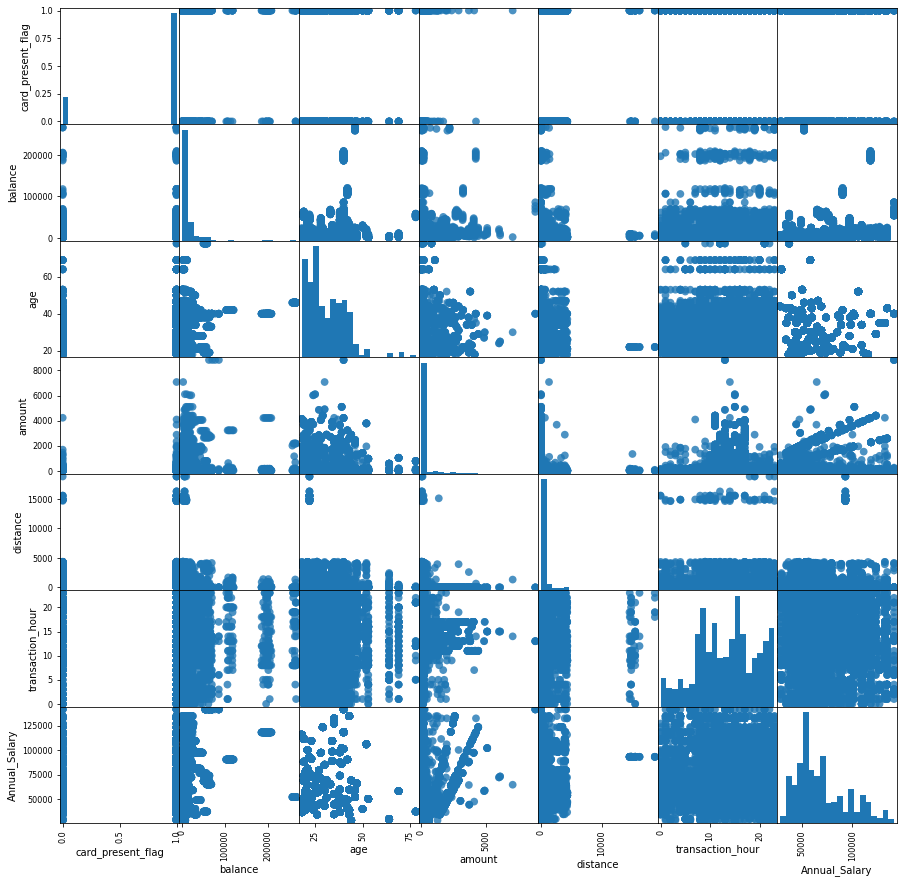

In [64]:
grr = pd.plotting.scatter_matrix(data, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

## Model Building

In [65]:
drop_columns = ['status', 'card_present_flag', 'currency', 'long_lat', 'merchant_id', 'first_name', 'date', 'age',
                'merchant_suburb', 'merchant_state','account', 'customer_longitude', 'customer_latitude',
                'extraction', 'country', 'customer_id', 'merchant_long_lat', 'merchant_longitude', 'merchant_latitude']

data.drop(drop_columns , axis=1 , inplace=True)

df = pd.get_dummies(data)

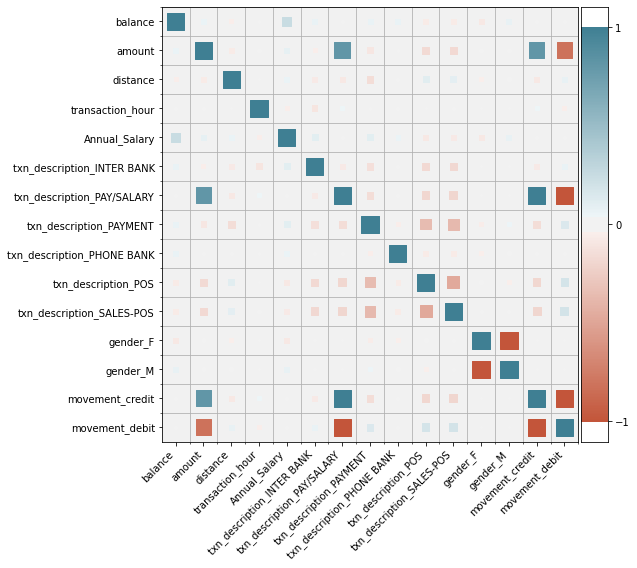

In [66]:
col = ['balance', 'amount', 'distance', 'transaction_hour', 'Annual_Salary',
       'txn_description_INTER BANK', 'txn_description_PAY/SALARY',
       'txn_description_PAYMENT', 'txn_description_PHONE BANK',
       'txn_description_POS', 'txn_description_SALES-POS', 'gender_F',
       'gender_M', 'movement_credit', 'movement_debit']

plt.figure(figsize=(8, 8))
corrplot(df[col].corr(), size_scale=300, );

In [67]:
X = df.drop('Annual_Salary' , axis=1)
y = df['Annual_Salary']

X.shape , y.shape

((12043, 64), (12043,))

In [68]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

In [69]:
def cal_score(y_pred, y_true):
    print(f'R2 Score - {r2_score(y_true , y_pred)}')
    print(f'Mean Absolute Error - {mean_absolute_error(y_true , y_pred)}')
    print(f'Mean Squared Error - {mean_squared_error(y_true, y_pred)}')

In [70]:
transformer = Normalizer()
X_train = transformer.fit_transform(X_train)

X_test = transformer.transform(X_test)

In [71]:
np.random.seed(42)
model_lin = LinearRegression()
model_lin.fit(X_train , y_train)
y_pred = model_lin.predict(X_test)

cal_score(y_pred, y_test)

R2 Score - -0.4294258404702367
Mean Absolute Error - 19982.232246045332
Mean Squared Error - 968537242.3276385


In [72]:

np.random.seed(42)
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train , y_train)
y_pred = model_reg.predict(X_test)

cal_score(y_pred, y_test)

R2 Score - 0.6471271222619396
Mean Absolute Error - 6580.818732355401
Mean Squared Error - 239096365.98160776


In [73]:
np.random.seed(42)
model_reg = RandomForestRegressor(n_estimators = 100,     n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
model_reg.fit(X_train , y_train)
y_pred = model_reg.predict(X_test)

cal_score(y_pred, y_test)

R2 Score - 0.8074087115035756
Mean Absolute Error - 6758.83121926378
Mean Squared Error - 130494237.73904239


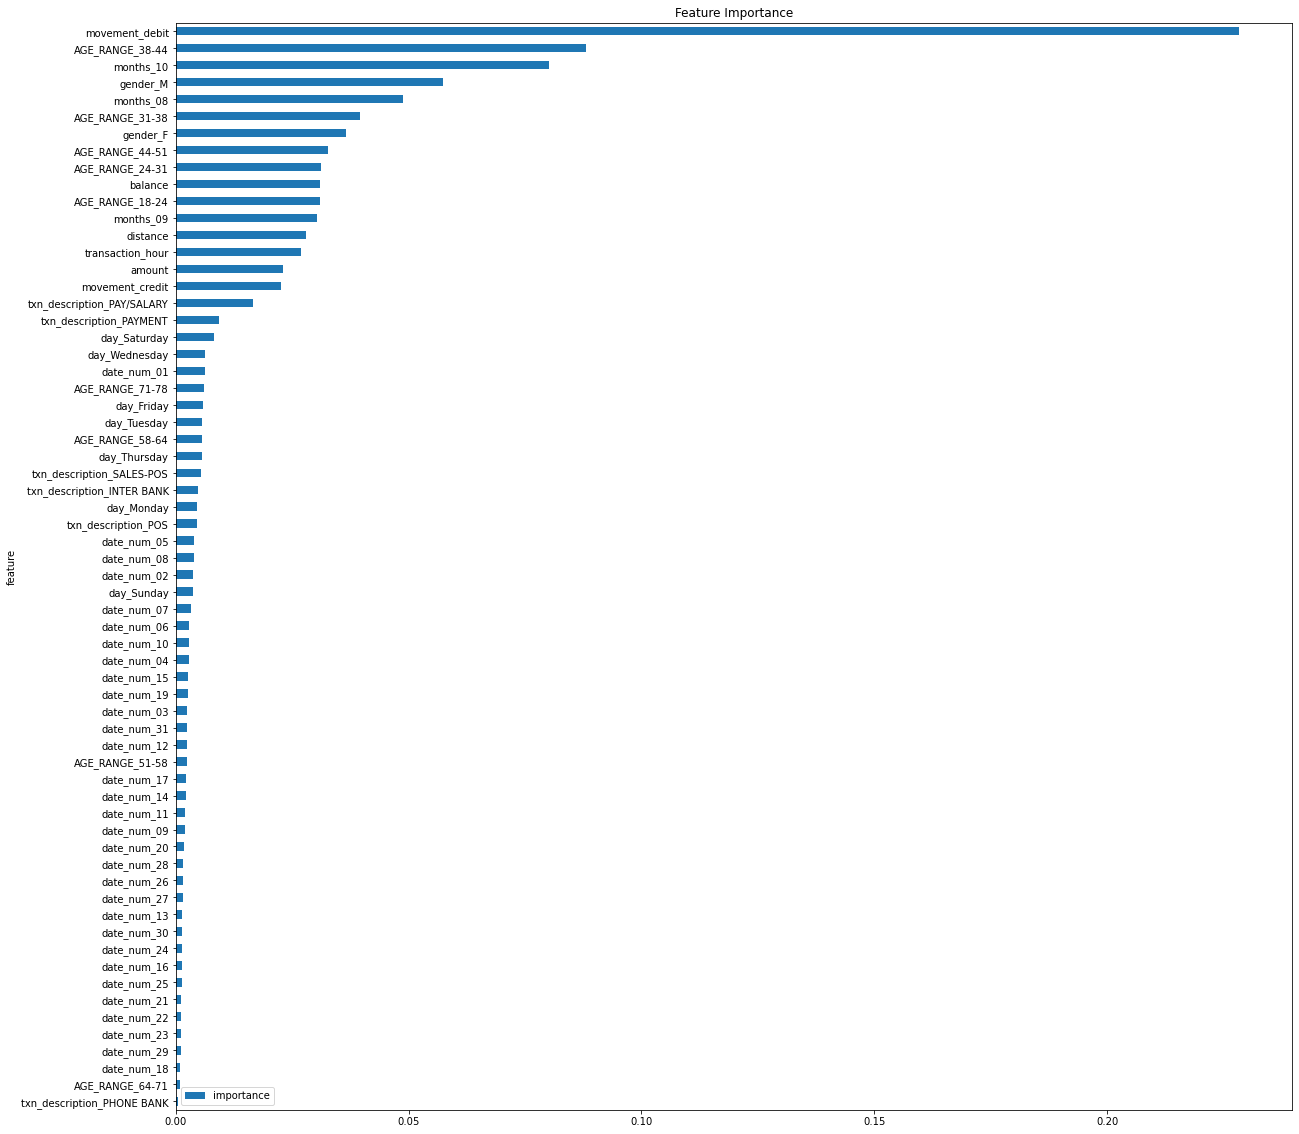

In [74]:
importance = model_reg.feature_importances_

pd.DataFrame(list(zip(list(X.columns), importance)), columns=['feature', 'importance']).set_index(
    'feature').sort_values('importance', ascending=True).plot(kind="barh", figsize=(20, 20), title = "Feature Importance")
plt.show()

surprisingly debit has highest importance !!!!

As data is low I dont recommend this model.